In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
data_dir = Path('/data').mkdir(parents=True, exist_ok=True)
!unzip /content/drive/MyDrive/Datasets/george_test_task.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/george_test_task/george/988ce475fccc163ac7b1c1e6f7031173.jpg  
  inflating: /content/data/george_test_task/george/07c4ec7e231cf6fea099fa46195b8385.jpg  
  inflating: /content/data/george_test_task/george/66ad382e3541ebadd615b5d1e614c722.jpg  
  inflating: /content/data/george_test_task/george/a42cc8460426f573a4803bb7ced26154.jpg  
  inflating: /content/data/george_test_task/george/8e7dbf2f11c3c1b88cf3f58211c83bde.jpg  
  inflating: /content/data/george_test_task/george/68e561c77aa27ed7a77136bc82afe450.jpg  
  inflating: /content/data/george_test_task/george/f33a25416d8e6d62c16e1fd9c2de457b.jpg  
  inflating: /content/data/george_test_task/george/7242b36419a4e0f2341e66aeed6f223a.jpg  
  inflating: /content/data/george_test_task/george/f387289e41e653dc755de9c8e5671443.jpg  
  inflating: /content/data/george_test_task/george/0d21b4da2e56ab4f437c2f7d7cbb6969.jpg  
  inflating: /content/data/george_test_task/georg

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
data_dir = '/content/data'
george_data = data_dir+'/george_test_task'
george_data_splitted = Path(data_dir+'/george_test_task_splitted').mkdir(parents=True, exist_ok=True)
george_data_splitted = '/content/data/george_test_task_splitted'
splitfolders.ratio(george_data, output=george_data_splitted,
        seed=42, ratio=(0.70, 0.20, 0.10), group_prefix=None, move=False)

Copying files: 6049 files [00:05, 1152.83 files/s]


In [ ]:
import glob
Total_train_data = glob.glob(george_data_splitted+'/train/*/*')
Total_val_data = glob.glob(george_data_splitted+'/val/*/*')
Total_test_data = glob.glob(george_data_splitted+'/test/*/*')
print(f'Total images for Training {len(Total_train_data)},\nTotal images for Validation : {len(Total_val_data)},\nTotal images for Testing : {len(Total_test_data)} ')

Total images for Training 4233,
Total images for Validation : 1209,
Total images for Testing : 607 


Width : 236, Height:649
Class_name:no_george


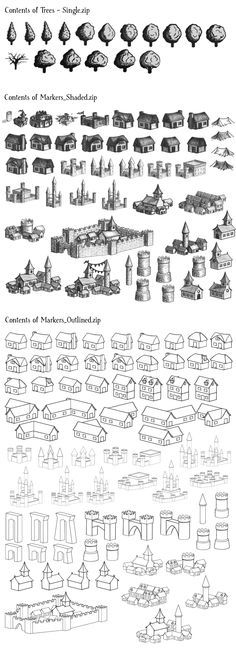

In [ ]:
from PIL import Image
im = Image.open(Total_train_data[0])
w, h = im.size
class_ = Total_train_data[0].split('/')[-2]

print(f'Width : {w}, Height:{h}')
print(f'Class_name:{class_}')
im

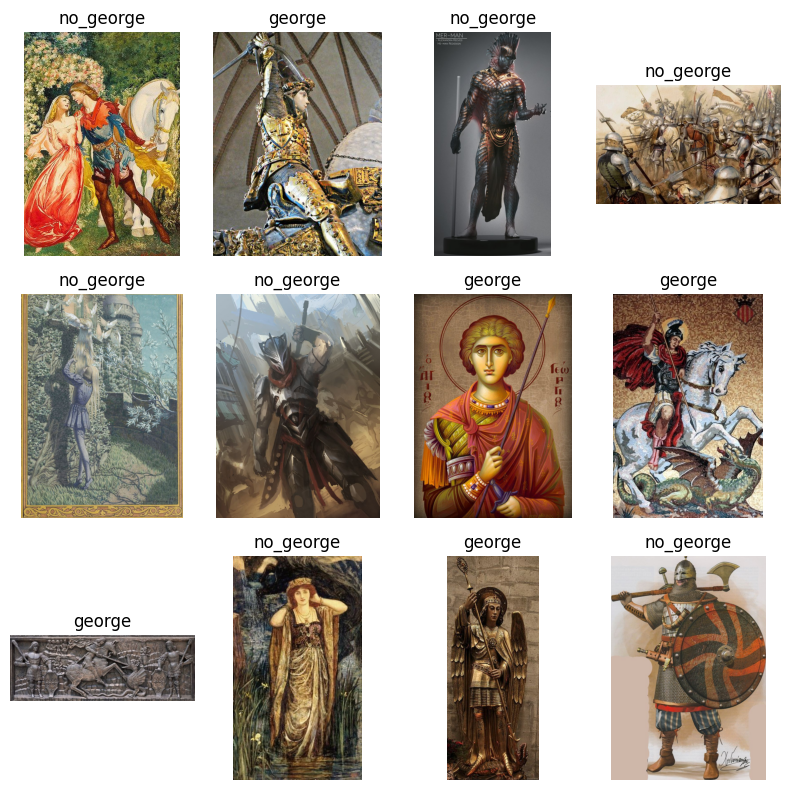

In [ ]:

import os
import glob
import random
from PIL import Image
import matplotlib.pyplot as plt

george_data_splitted = '/content/data/george_test_task_splitted'

global_path = glob.glob(george_data_splitted+'/*/*/*.jpg')

random_paths = random.choices(global_path, k=12)

# Create a new figure
plt.figure(figsize=(8, 8))

# Plot the images
for i, image_file in enumerate(random_paths[:12]):
    #print(image_file)

    image = Image.open(image_file)

    # Add subplot with 3 rows, 3 columns, and i+1 index
    plt.subplot(3, 4, i + 1)

    # Plot the image
    plt.imshow(image)
    plt.title(image_file.split('/')[-2])  # Set the title as the file name
    plt.axis('off')  # Turn off axis labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import torch
import torchvision
from torchvision.datasets import ImageFolder

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.75),
    transforms.RandomVerticalFlip(p=0.75),
    transforms.ToTensor()
])

In [ ]:
from torchvision import transforms
transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [ ]:
train_dir = george_data_splitted +'/train'
val_dir = george_data_splitted +'/val'
test_dir = george_data_splitted +'/test'

train_dir_ = ImageFolder(train_dir, transform=train_transforms)
val_dir_ = ImageFolder(val_dir, transform=transforms)
test_dir_ = ImageFolder(test_dir, transform=transforms)

In [ ]:
import os
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dir_,batch_size=32, shuffle=True, num_workers=os.cpu_count())
val_dataloader = DataLoader(val_dir_,batch_size=32, shuffle=False, num_workers=os.cpu_count())
test_dataloader = DataLoader(test_dir_,batch_size=32, shuffle=False, num_workers=os.cpu_count())
train_dataloader, val_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ce1984dab60>,
 <torch.utils.data.dataloader.DataLoader at 0x7ce1984db310>)

In [ ]:
print(f'Total number of images in train_loader: {len(Total_train_data)} and Total number of batches: {len(train_dataloader)}')
print(f'Total number of images in val_loader: {len(Total_val_data)} and Total number of batches: {len(val_dataloader)}')
print(f'Total number of images in test_dir: {len(Total_test_data)}and Eval batches:{len(test_dataloader)}')

Total number of images in train_loader: 4233 and Total number of batches: 125
Total number of images in val_loader: 1209 and Total number of batches: 36
Total number of images in test_dir: 607and Eval batches:18


In [ ]:
images, labels = next(iter(train_dataloader))
img = images[0]
print(f'Image shape {images.shape}, Label size {labels.shape}')

Image shape torch.Size([32, 3, 224, 224]), Label size torch.Size([32])


In [ ]:
class_names = train_dir_.classes
class_names

['george', 'no_george']

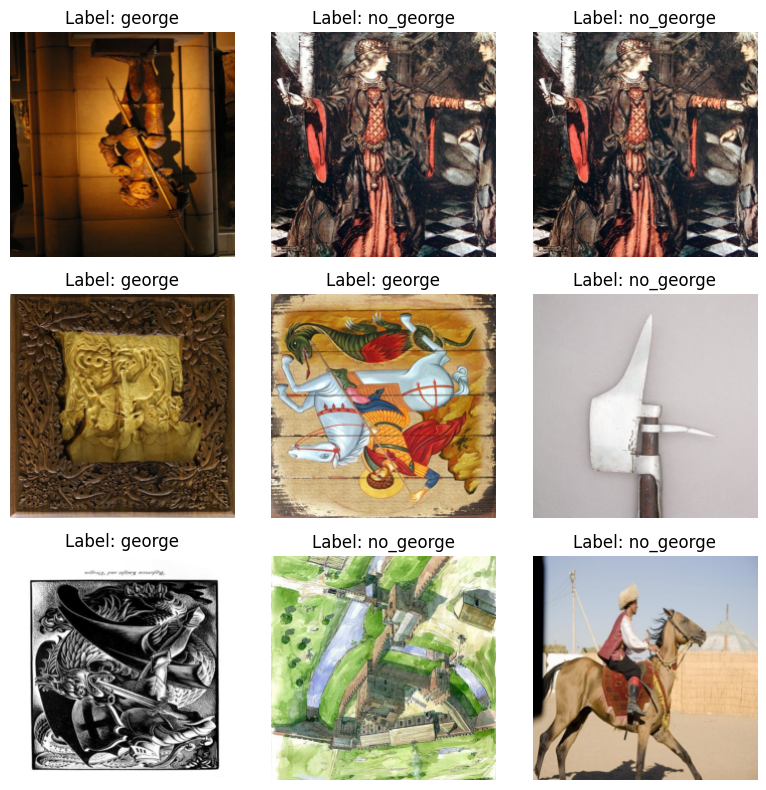

In [ ]:
images, labels = next(iter(train_dataloader))
n=9
rand = random.choices(range(len(images)), k=9)
#rand_ = random.sample(range(len(images)), k=7)
fig = plt.figure(figsize=(8, 8))

for i, idx in enumerate(rand):
    image = images[idx].permute(1,2,0)
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image)
    ax.set_title(f"Label: {class_names[labels[idx]]}")
    ax.axis('off')

#     plt.subplot(3, 3, i + 1)
#     plt.imshow(image)
#     plt.title(f"Label: {class_names[labels[idx]]}")
#     plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#import torchvision
from torchvision.models import ResNet50_Weights, resnet50
w = ResNet50_Weights.DEFAULT
res50 = resnet50(weights = w)
res50

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 47.8MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
import torch
from torch import nn
for param in res50.parameters():
  param.requires_grad = False
for param in res50.fc.parameters():
  param.requires_grad = True

res50.fc = torch.nn.Linear(in_features=2048, out_features=1)

In [ ]:
!pip install -q torchinfo
from torchinfo import summary
summary(model=res50,
       input_size=(32, 3, 224, 224),
       col_names=["input_size","output_size","trainable", 'num_params'],
       row_settings=["var_names"],
       col_width=10)

Layer (type (var_name))                  Input Shape Output Shape Trainable  Param #
ResNet (ResNet)                          [32, 3, 224, 224] [32, 1]    Partial    --
├─Conv2d (conv1)                         [32, 3, 224, 224] [32, 64, 112, 112] False      (9,408)
├─BatchNorm2d (bn1)                      [32, 64, 112, 112] [32, 64, 112, 112] False      (128)
├─ReLU (relu)                            [32, 64, 112, 112] [32, 64, 112, 112] --         --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112] [32, 64, 56, 56] --         --
├─Sequential (layer1)                    [32, 64, 56, 56] [32, 256, 56, 56] False      --
│    └─Bottleneck (0)                    [32, 64, 56, 56] [32, 256, 56, 56] False      --
│    │    └─Conv2d (conv1)               [32, 64, 56, 56] [32, 64, 56, 56] False      (4,096)
│    │    └─BatchNorm2d (bn1)            [32, 64, 56, 56] [32, 64, 56, 56] False      (128)
│    │    └─ReLU (relu)                  [32, 64, 56, 56] [32, 64, 56, 56] --         --

In [ ]:
import torch
rand_image = torch.rand(1,3,224,224)
rand_image.shape

torch.Size([1, 3, 224, 224])

In [ ]:
next(res50.parameters()).device

device(type='cpu')

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    total = 0

    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_logits = model(X)


        # Calculate and accumulate loss
        loss = loss_fn(y_logits, y.unsqueeze(1).float())

        train_loss += loss.item()
        #print(train_loss)
        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.round(torch.sigmoid(y_logits))
        #print(y_pred_class.squeeze(), y)
        train_acc += ((y_pred_class.squeeze() == y).sum().item())/len(y_pred_class)
        #print(train_acc)
        total += y.size(0)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)

    return train_loss, train_acc


In [ ]:

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    total_labels = 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y.unsqueeze(1).float())
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = torch.round(torch.sigmoid(test_pred_logits))
            test_acc += ((test_pred_labels.squeeze() == y).sum().item()/len(test_pred_logits))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm
from pathlib import Path
# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          save_dir : str,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 10):


    # 2. Create empty results dictionary
    patience = 3
    best_val_loss = float('inf')
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    saved_models = Path(save_dir+'/')
    saved_models.mkdir(parents=True, exist_ok=True)

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                              dataloader=train_dataloader,
                                              loss_fn=loss_fn,
                                              optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
              dataloader=test_dataloader,
              loss_fn=loss_fn)



            # 4. Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f} | "
      )

          # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

          # if (epoch + 1) % 5 == 0:

        #checkpoint_path = f'{saved_models}/model_checkpoint_epoch_{epoch + 1}.pth'

        if test_loss < best_val_loss:
          best_val_loss = test_loss
          epochs_without_improvement = 0


          if (epoch + 1) % 1== 0:
            checkpoint_path = saved_models / f'model_checkpoint_epoch_{epoch + 1}.pth'
            torch.save(model.state_dict(), checkpoint_path)
            print(f'Model checkpoint saved at epoch {epoch + 1} with Test loss: {test_loss:.4f}')

        else:
          epochs_without_improvement += 1
          print(f'Epoch {epoch + 1}: Test loss did not improve.')

           # Check for early stopping
        if epochs_without_improvement >= patience:
          print(f'Early stopping after {epochs_without_improvement} epochs without improvement.')
          break


    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#loss function
loss_fn = nn.BCEWithLogitsLoss()

#optimizer

optimizer = torch.optim.SGD(params=res50.parameters(), lr=0.001)


# Start the timer
from timeit import default_timer as timer
start_time = timer()

results = train(model=res50,
            train_dataloader = train_dataloader,
            test_dataloader = val_dataloader,
            save_dir = 'saved_models',
            optimizer=optimizer,
            loss_fn=loss_fn,
            epochs=35)
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/35 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


In [ ]:
plot_loss_curves(results)

In [ ]:
res50_params = sum(torch.numel(param) for param in res50.parameters())
res50_params

In [ ]:
param_size = 0
for param in res50.parameters():
  #print(param.nelement(), param.element_size())
  param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in res50.buffers():
  buffer_size += buffer.nelement() * buffer.element_size()

size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))

In [ ]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        transform: torchvision.transforms,
                        device: torch.device=device):

    img = Image.open(image_path)

    True_label = str(image_path).split('/')[-2]
    image_transform = transform

    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)

    target_image_pred_probs = torch.round(torch.sigmoid(target_image_pred))


    # 9. Convert prediction probabilities -> prediction labels
    #target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability
    plt.figure(figsize=(6,6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Pred_label: {class_names[int(target_image_pred_probs.squeeze(dim=1))]}")
    plt.axis(False);

    #plt.figure(figsize=(4,4))
    plt.subplot(1, 2, 2)
    plt.imshow(img)
    plt.title(f"True_label: {True_label}")
    plt.axis(False);

In [ ]:
# Get a random list of image paths from test set
import random
num_images_to_plot = 5
test_image_path_list = list(Path(test_dir).glob("*/*.jpg"))
test_image_path_sample = random.sample(population=test_image_path_list,
                                       k=num_images_to_plot)

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=res50,
                        image_path=image_path,
                        class_names=class_names,
                        transform=transforms)

In [ ]:

res50.fc = torch.nn.Linear(in_features=2048, out_features=1)
best_model = res50
PATH = '/content/saved_models/model_checkpoint_epoch_34.pth'

best_model.load_state_dict(torch.load(PATH))


In [ ]:
pip install torchmetrics

In [ ]:
from PIL import Image
from torchmetrics.classification import BinaryF1Score, BinaryAccuracy, BinaryConfusionMatrix, ConfusionMatrix
from sklearn import metrics
def model_eval(model, eval_dataloader, device):
    model.to(device)
    model.eval()
    correct = 0
    total = 0
    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for image, label in eval_dataloader:
            X, y = image.to(device), label.to(device)
            y_pred = model(X)

            pred = torch.round(torch.sigmoid(y_pred))
            correct += (pred.squeeze() == y).sum().item()
            total += y.size(0)

            true_labels.extend(y.tolist())
            pred_labels.extend(pred.squeeze().tolist())

    accuracy = correct / total

    F1 = BinaryF1Score()
    F1_score = F1(torch.tensor(pred_labels), torch.tensor(true_labels))

    ACC = BinaryAccuracy()
    binary_acc = ACC(torch.tensor(pred_labels), torch.tensor(true_labels))

    confmat = ConfusionMatrix(task='binary')
    cm = confmat(torch.tensor(pred_labels), torch.tensor(true_labels))


    classification_report = metrics.classification_report(true_labels, pred_labels)


    return F1_score, accuracy, binary_acc, len(true_labels), len(pred_labels), cm, classification_report


In [ ]:
F1_score, accuracy, binary_acc, true_labels, pred_labels, cm, classification_report  = model_eval(best_model, test_dataloader, device )
print(f'F1 score : {F1_score}, accuracy:{accuracy}, binary_acc:{binary_acc}, len of true labels: {true_labels}, len of pred labels:{pred_labels},Confusion matrix:\n {cm}, classification report:\n{classification_report}')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt=',d', xticklabels=class_names, yticklabels=class_names) #by default it is'.2g'
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.savefig('Confusionmatrix_4adam_aug.png')
plt.show()

In [ ]:
# Get a random list of image paths from test set
import random
num_images_to_plot = 10
test_image_path_list = list(Path(test_dir).glob("*/*.jpg"))
test_image_path_sample = random.sample(population=test_image_path_list,
                                       k=num_images_to_plot)

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=best_model,
                        image_path=image_path,
                        class_names=class_names,
                        transform=transforms)

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/St._Georg%2C_Donatello%2C_1416-17%2C_Bargello_Florenz-03.jpg/220px-St._Georg%2C_Donatello%2C_1416-17%2C_Bargello_Florenz-03.jpg

In [ ]:
rand_image = '/content/220px-St._Georg,_Donatello,_1416-17,_Bargello_Florenz-03.jpg'
image = Image.open(rand_image)
image

In [ ]:
next(best_model.parameters()).device

In [ ]:
transforms

In [ ]:
rand_image = '/content/220px-St._Georg,_Donatello,_1416-17,_Bargello_Florenz-03.jpg'
image = Image.open(rand_image)

best_model.eval()
with torch.inference_mode():
  transformed_image = transforms(image).unsqueeze(dim=0)
  target_image_pred = best_model(transformed_image.to(device))
  target_image_pred_probs = torch.round(torch.sigmoid(target_image_pred))
  #print(int(target_image_pred_probs.squeeze(dim=1)))
  plt.imshow(transformed_image.squeeze(dim=0).permute(1,2,0))
  plt.title(f'Predicted as {class_names[int(target_image_pred_probs.squeeze(dim=1))]}')
  plt.axis('off')